# Face Recognition 

In [62]:
# Import libraries
import tensorflow as tf
import numpy as np
import pre_trained_facenet
import cv2
from mtcnn.mtcnn import MTCNN
import xlrd
import glob
from matplotlib import pyplot as plt

## The taken photo is ran through the algorithm for verification: 
#### - If it meets the requirements for a biometrical picture
#### - If the user is the owner of the ID


2


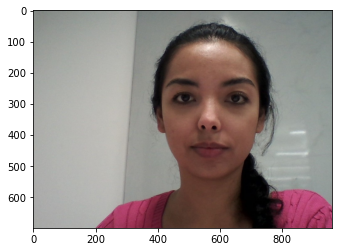

In [63]:
val = input("Enter your option")
print(val)
if (val=='1'):
  camera = cv2.VideoCapture(0)
  return_value, camshot = camera.read()
  cv2.imwrite('captured/cam.jpg', camshot)
  img2 = cv2.imread("captured/cam.jpg")
  del(camera)
elif (val=='2'):
  img2 = cv2.imread("Input/cam.jpg")
else:
  print("Wrong Choice")
  exit()
detector = MTCNN()
plt.figure()
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()


In [64]:
minsize = 20
threshold = [0.6, 0.7, 0.7]
factor = 0.709
margin = 44
input_image_size = 160
loc = ("data.xls")
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)
sess = tf.Session()

In [65]:
pre_trained_facenet.load_model("20170512-110547/20170512-110547.pb")


Model filename: 20170512-110547/20170512-110547.pb


In [66]:
# Get input and output tensors
images_placeholder = tf.get_default_graph().get_tensor_by_name("input:0")
embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")
embedding_size = embeddings.get_shape()[1]

In [67]:
def getFace(img):
    faces=[]
    result = detector.detect_faces(img)
    # Result is an array with all the bounding boxes detected. We know that for 'ivan.jpg' there is only one.

    bounding_box = result[0]['box']
    keypoints = result[0]['keypoints']
    cv2.rectangle(img,
                  (bounding_box[0], bounding_box[1]),
                  (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
                  (0,155,255),
                  2)
    cv2.circle(img,(keypoints['left_eye']), 2, (0,155,255), 2)
    cv2.circle(img,(keypoints['right_eye']), 2, (0,155,255), 2)
    cv2.circle(img,(keypoints['nose']), 2, (0,155,255), 2)
    cv2.circle(img,(keypoints['mouth_left']), 2, (0,155,255), 2)
    cv2.circle(img,(keypoints['mouth_right']), 2, (0,155,255), 2)
    cv2.imwrite("check/dd_drawn.jpg", img)
    cropped=img[bounding_box[1]:bounding_box[1] + bounding_box[3], bounding_box[0]:bounding_box[0]+bounding_box[2]]
    cv2.imwrite("check/dd_cropped.jpg", cropped)

    shw = plt.figure()
    shw.add_subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    shw.add_subplot(1,2,2)
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    plt.show(block=True)
    
    rearranged= cv2.resize(cropped, (input_image_size,input_image_size),interpolation=cv2.INTER_CUBIC)
    cv2.imwrite("check/dd_resized.jpg",rearranged)
    prewhitened = pre_trained_facenet.prewhiten(rearranged)
    faces.append({'face':rearranged,'embedding':getEmbedding(prewhitened)})
    return faces
def getEmbedding(resized):
    reshaped = resized.reshape(-1,input_image_size,input_image_size,3)
    feed_dict = {images_placeholder: reshaped, phase_train_placeholder: False}
    embedding = sess.run(embeddings, feed_dict=feed_dict)
    return embedding

def compare2face(img1,img2):
    face1 = getFace(img1)
    face2 = getFace(img2)
    if face1 and face2:
        # calculate Euclidean distance
        dist = np.sqrt(np.sum(np.square(np.subtract(face1[0]['embedding'], face2[0]['embedding']))))
        return dist
    return -1

## The taken photo will be compared to the current photo in the database

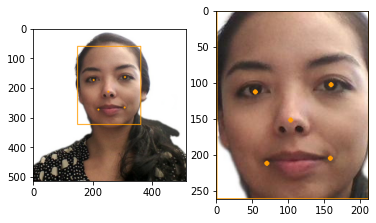

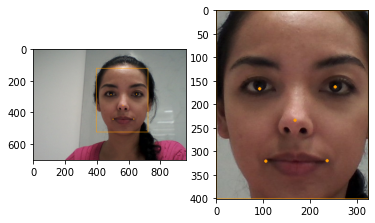

distance = 0.38437423
It is verified to be Natasha Li Vieira
Your picture meets the requirements needed


In [68]:
for j in range (1,sheet.nrows):
    img1 = cv2.imread("database/Person"+str(j)+".jpg")
    distance=compare2face(img1,img2)
    threshold = 0.9   #parameter can be adjusted to meet requirements
    print("distance = "+str(distance))
    if(distance <= threshold):
       print("It is verified to be "+str(sheet.cell_value(j,1)))
       print("Your picture meets the requirements needed")
       break

### The current photo will now be processed with the **Biometrical Photo model**